# **TASK**

### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

**Dataset Link:**  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
#Importing python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Reading the .CSV file
df = pd.read_csv('/content/drive/MyDrive/PRODIGY_DATA_SCIENCE_INTERNSHIP/DS_TASK_03/bank_data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.rename(columns={'y':'Deposit'}, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Deposit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.nunique().sort_values() #Checking for unique values

Deposit         2
loan            2
housing         2
default         2
contact         3
marital         3
poutcome        4
education       4
job            12
month          12
day            31
previous       41
campaign       48
age            77
pdays         559
duration     1573
balance      7168
dtype: int64

In [ ]:
df.isnull().sum() #Checking for null/missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Deposit      0
dtype: int64

In [ ]:
# Converting tearget categorical column [term_deposit] to numerical
df['Deposit'] = df['Deposit'].map({'no': 0, 'yes': 1})

## **Data Visualisation**

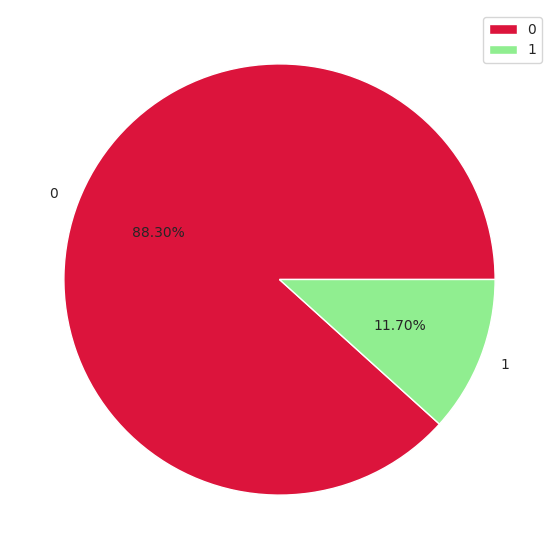

In [ ]:
#Pie chart for DEPOSIT
plt.figure(figsize=(7,7))
## Percentage Distribution of term deposit column through pie chart
plt.pie(df['Deposit'].value_counts().values,labels=df['Deposit'].value_counts().index,autopct='%.2f%%',colors=['crimson','lightgreen'])
plt.legend()
plt.show()

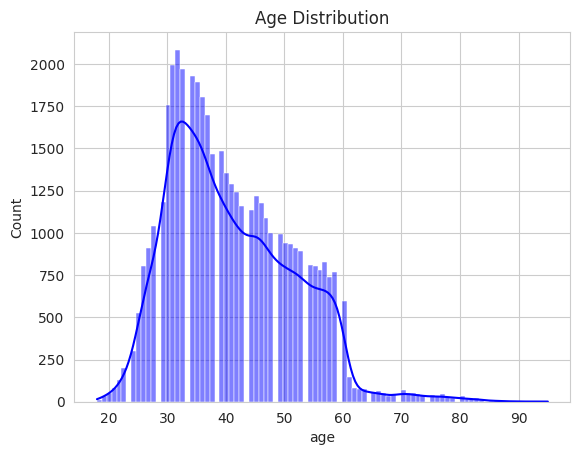

In [ ]:
#Age distribution
sns.histplot(x='age', data=df, kde=True,color='blue')
plt.title('Age Distribution')
plt.show()

In [ ]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

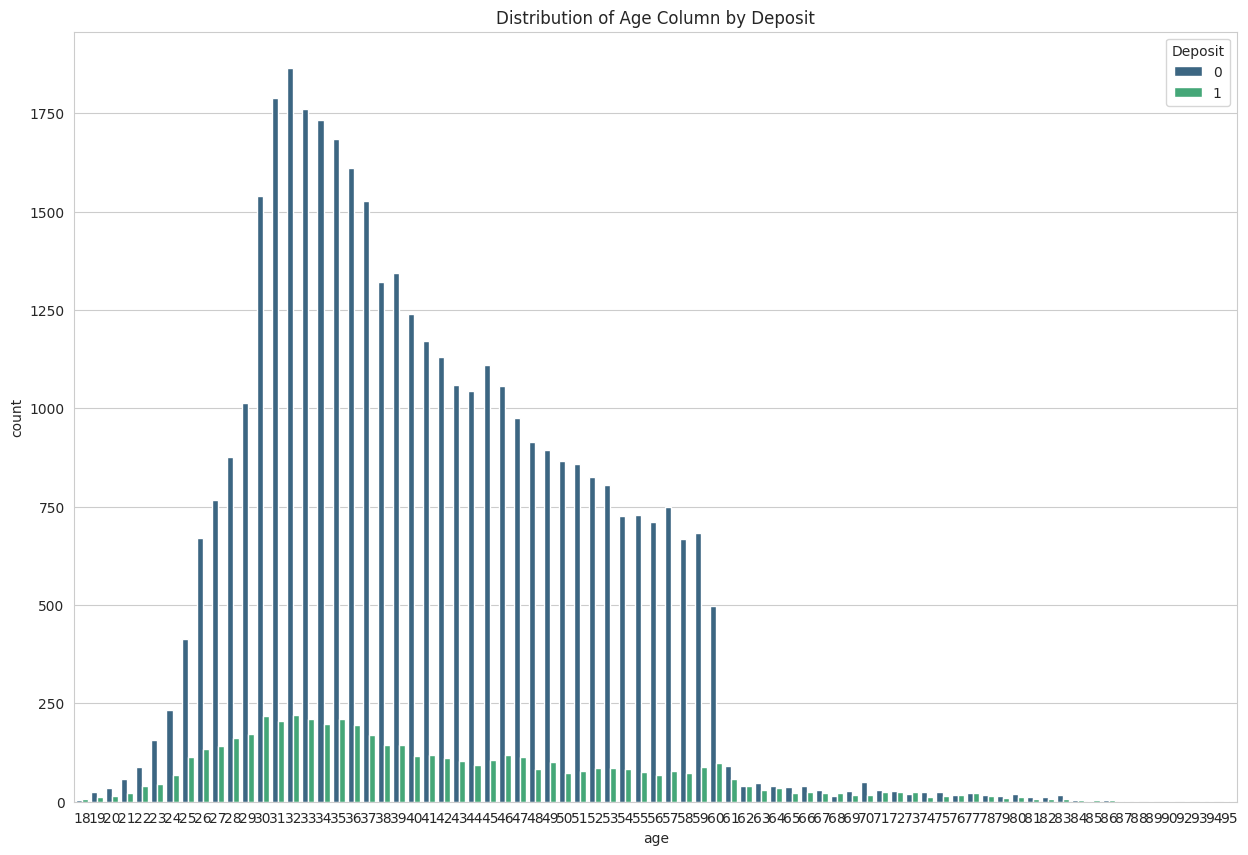

In [ ]:
#people by Age as per Deposit
plt.figure(figsize=(15,10))
sns.countplot(x='age',hue='Deposit',data=df,palette='viridis')
plt.title('Distribution of Age Column by Deposit')
plt.show()

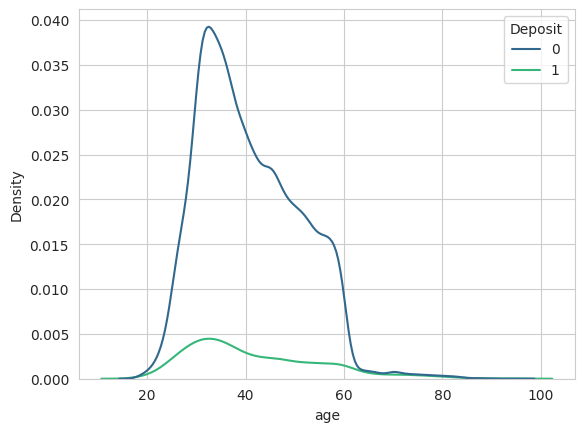

In [ ]:
sns.kdeplot(x=df['age'],hue=df['Deposit'], palette='viridis')
plt.show()
## 1= Yes,  0=No

Text(0.5, 1.0, 'CountPlot for Job')

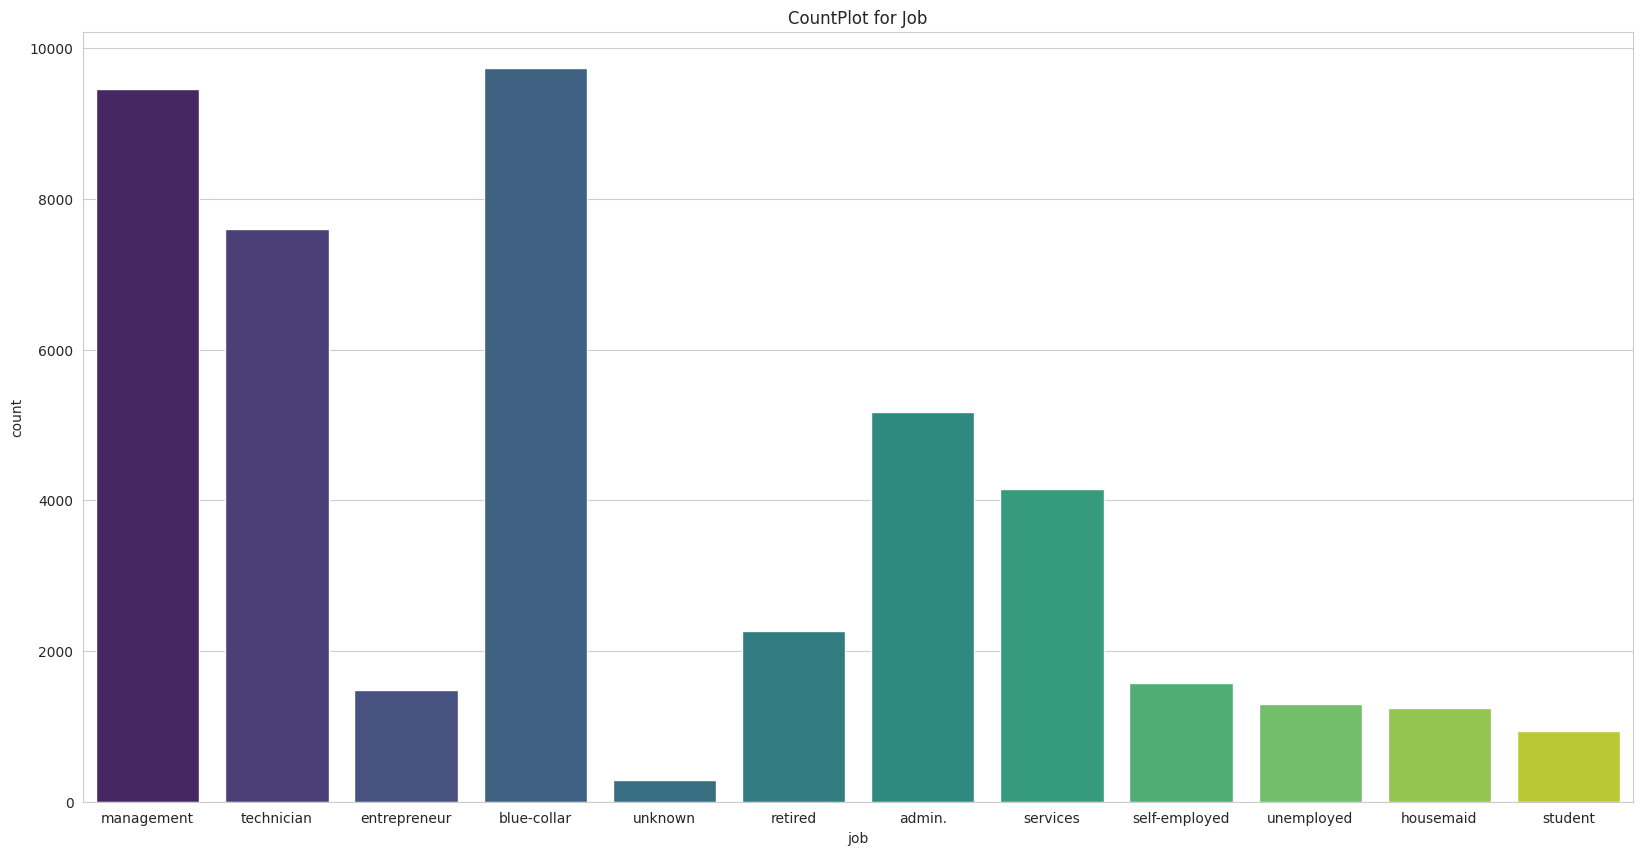

In [ ]:
#CountPlot for Jobs in various fields
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x=df['job'], palette='viridis')
plt.title('CountPlot for Job')

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

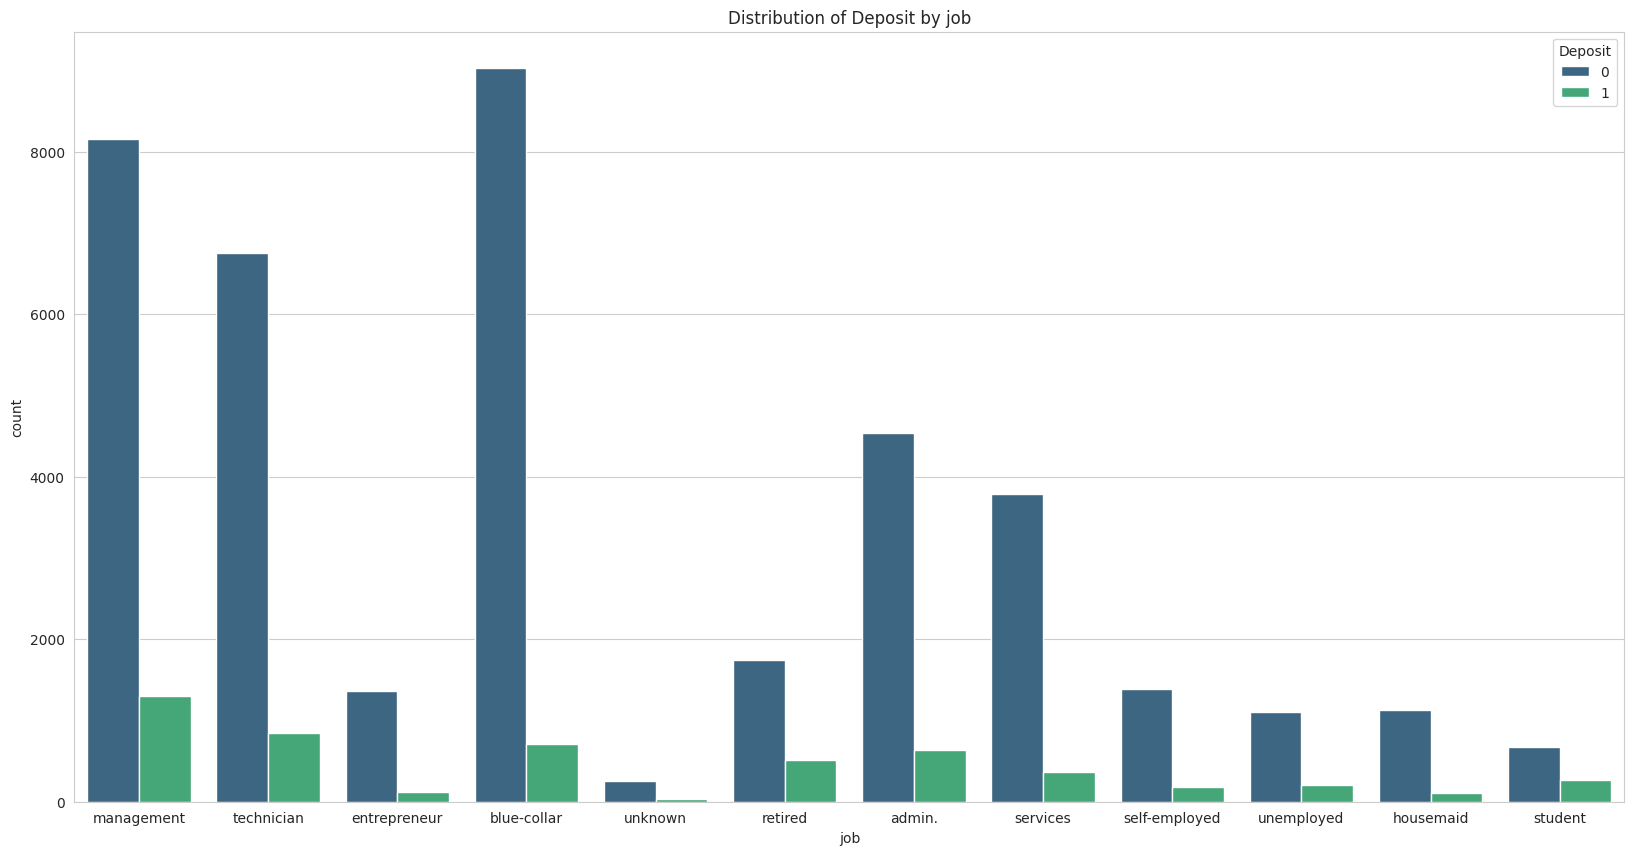

In [ ]:
#Deposit v/s job
plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='Deposit',data=df, palette='viridis')
plt.title('Distribution of Deposit by job')
plt.show()

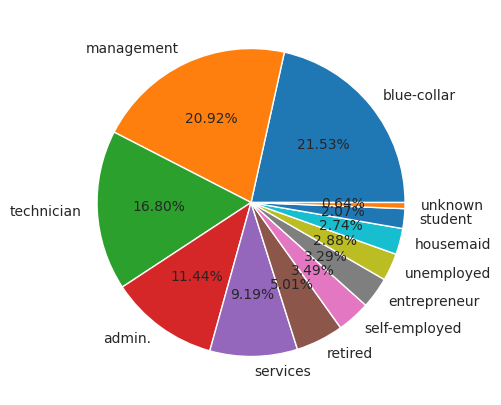

In [ ]:
# Pie Chart Percentage Distribution of job
plt.figure(figsize=(5,5))
plt.pie(df['job'].value_counts().values,labels=df['job'].value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
# Percentage distribution of job by Deposit
df.groupby(['job'])['Deposit'].mean()*100

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: Deposit, dtype: float64

Text(0.5, 1.0, 'CountPlot for Housing')

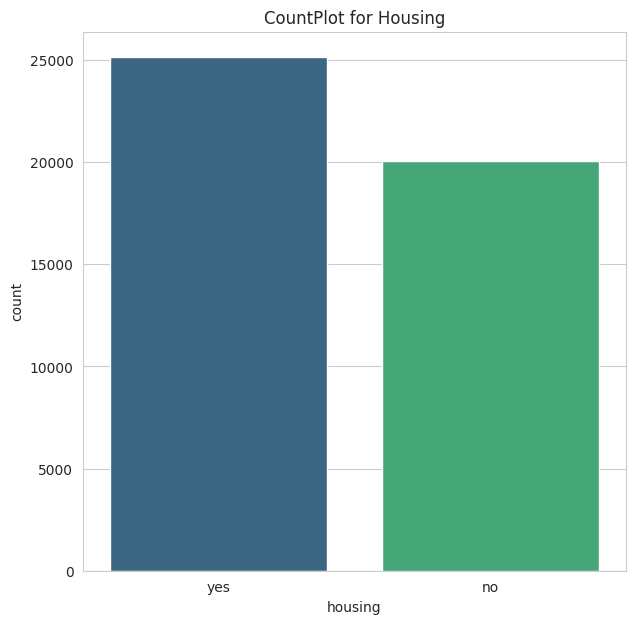

In [ ]:
#Housing
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.countplot(x=df['housing'], palette='viridis')
plt.title('CountPlot for Housing')

In [ ]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

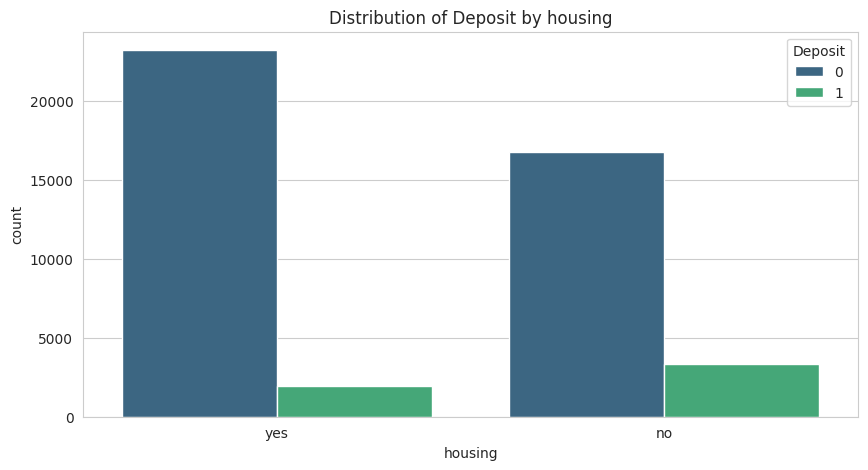

In [ ]:
#Deposit v/s housing
plt.figure(figsize=(10,5))
sns.countplot(x='housing',hue='Deposit',data=df, palette='viridis')
plt.title('Distribution of Deposit by housing')
plt.show()

In [ ]:
#Percentage distribution of housing by Deposit
housing_pi= df.groupby(['housing'])['Deposit'].mean()*100

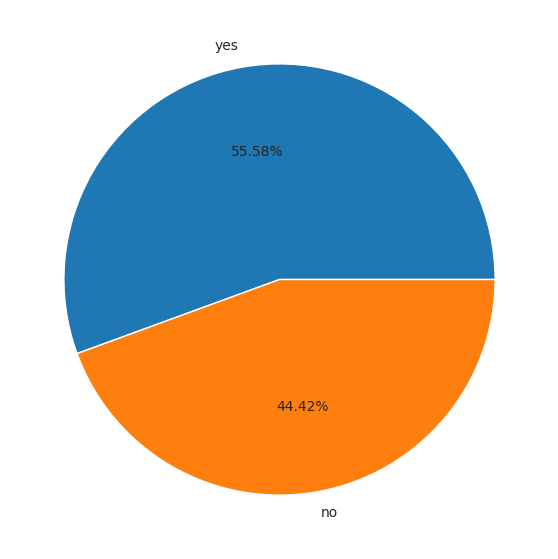

In [ ]:
# Pie chart Percentage Distribution of Deposit
plt.figure(figsize=(7,7))
plt.pie(df['housing'].value_counts().values,labels=df['housing'].value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
#Percentage distribution of housing by Deposit
df.groupby(['housing'])['Deposit'].mean()*100

housing
no     16.702355
yes     7.699960
Name: Deposit, dtype: float64

Text(0.5, 1.0, 'CountPlot for education')

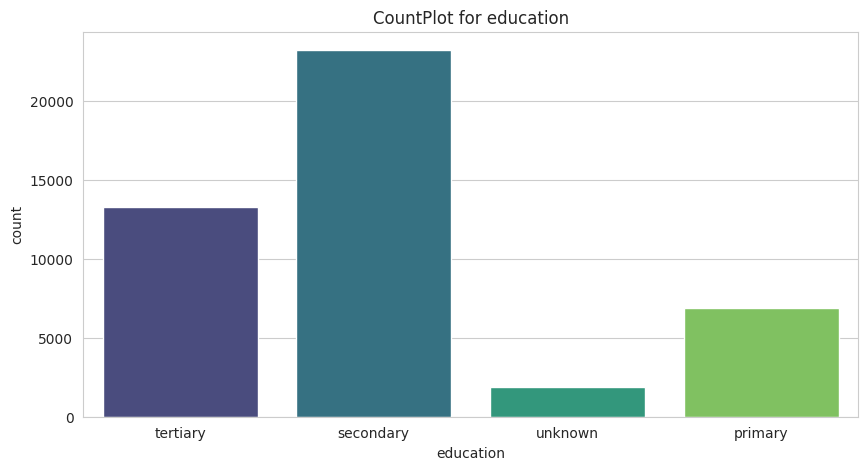

In [ ]:
#Education
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x=df['education'], palette='viridis')
plt.title('CountPlot for education')

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

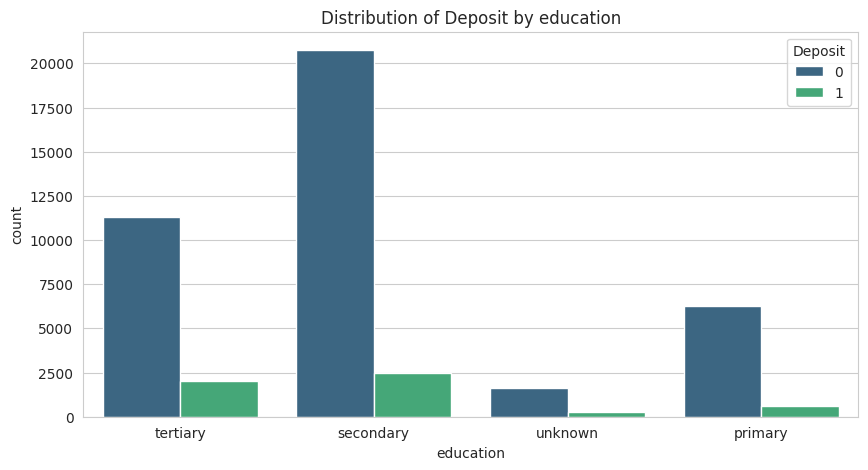

In [ ]:
#Deposit v/s education
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='Deposit',data=df, palette='viridis')
plt.title('Distribution of Deposit by education')
plt.show()

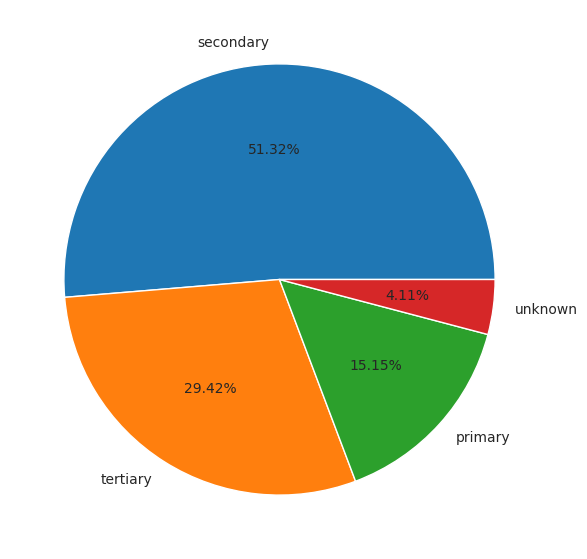

In [ ]:
# Pie chart Percentage Distribution of Deposit
plt.figure(figsize=(7,7))
plt.pie(df['education'].value_counts().values,labels=df['education'].value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
#Percentage distribution of housing by Deposit
df.groupby(['education'])['Deposit'].mean()*100

education
primary       8.626478
secondary    10.559435
tertiary     15.006390
unknown      13.570275
Name: Deposit, dtype: float64

Text(0.5, 1.0, 'CountPlot for Marital')

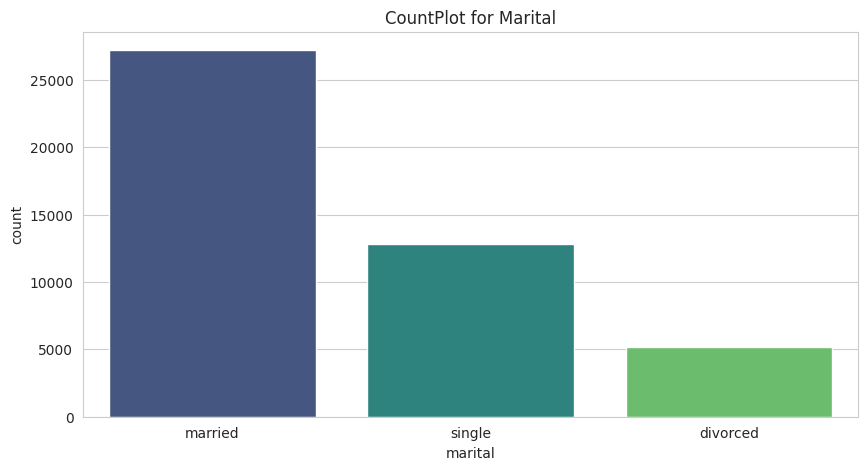

In [ ]:
#Marital
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x=df['marital'], palette='viridis')
plt.title('CountPlot for Marital')

In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

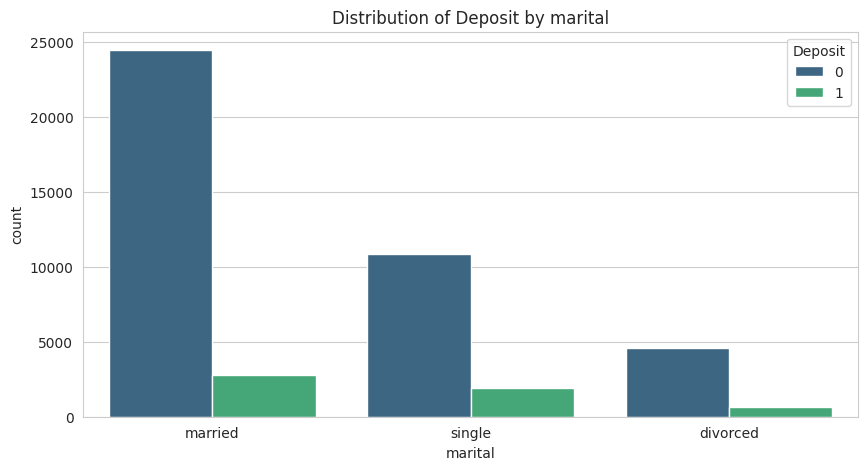

In [ ]:
#Deposit v/s marital base
plt.figure(figsize=(10,5))
sns.countplot(x='marital',hue='Deposit',data=df, palette='viridis')
plt.title('Distribution of Deposit by marital')
plt.show()

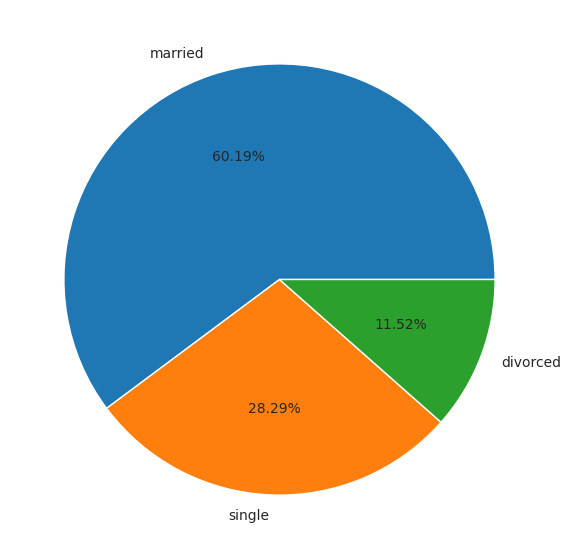

In [ ]:
# Pie chart Percentage Distribution of Deposit
plt.figure(figsize=(7,7))
plt.pie(df['marital'].value_counts().values,labels=df['marital'].value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
#Percentage distribution of housing by Deposit
df.groupby(['marital'])['Deposit'].mean()*100

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: Deposit, dtype: float64

Text(0.5, 1.0, 'CountPlot for Loan')

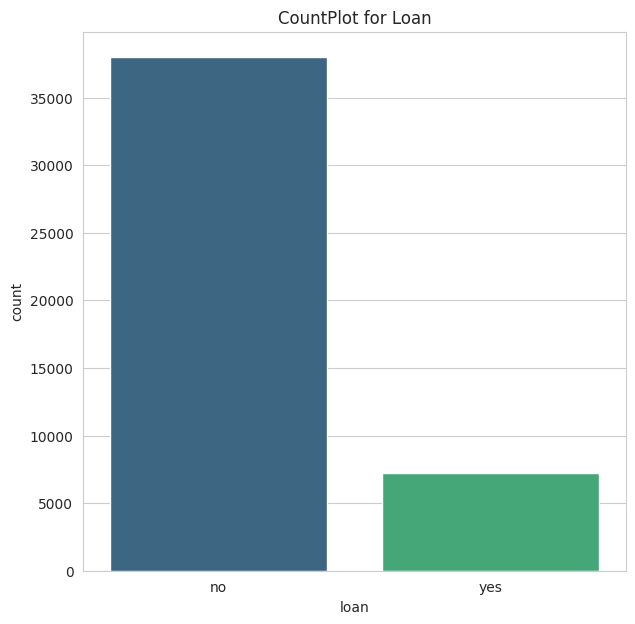

In [ ]:
#Loan
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.countplot(x=df['loan'], palette='viridis')
plt.title('CountPlot for Loan')

In [ ]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

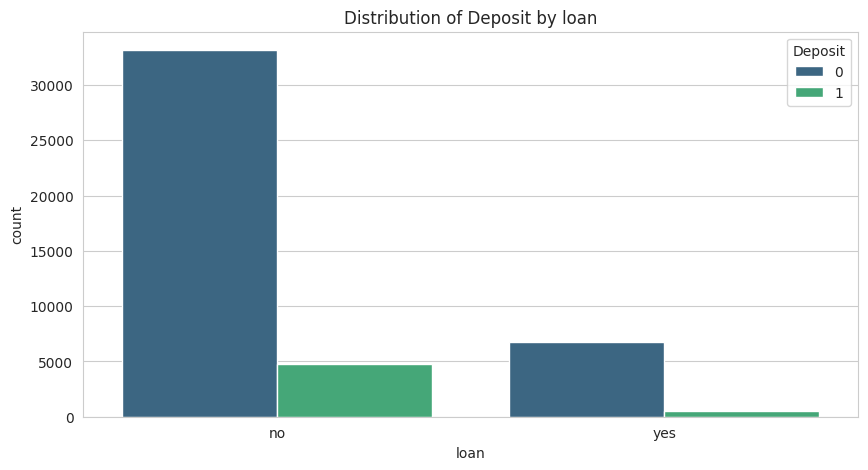

In [ ]:
#Deposit v/s loan
plt.figure(figsize=(10,5))
sns.countplot(x='loan',hue='Deposit',data=df, palette='viridis')
plt.title('Distribution of Deposit by loan')
plt.show()

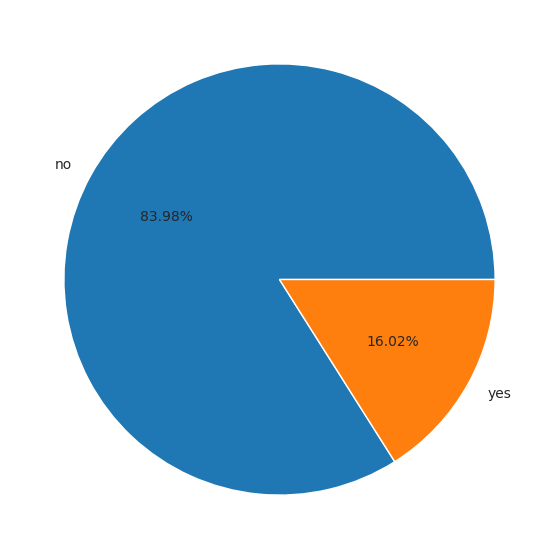

In [ ]:
# Pie chart Percentage Distribution of Deposit
plt.figure(figsize=(7,7))
plt.pie(df['loan'].value_counts().values,labels=df['loan'].value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
#Percentage distribution of housing by Deposit
df.groupby(['loan'])['Deposit'].mean()*100

loan
no     12.655727
yes     6.681391
Name: Deposit, dtype: float64

In [ ]:
#Correlation
# Dropping unnecessary categorical columns
d1=df.drop(columns=['job','marital','education','contact','poutcome','day','month','housing','loan','default'],axis=1)
d1

,age,balance,duration,campaign,pdays,previous,Deposit
0,58,2143,261,1,-1,0,no
1,44,29,151,1,-1,0,no
2,33,2,76,1,-1,0,no
3,47,1506,92,1,-1,0,no
4,33,1,198,1,-1,0,no
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes
45207,71,1729,456,2,-1,0,yes
45208,72,5715,1127,5,184,3,yes
45209,57,668,508,4,-1,0,no


In [ ]:
d1.corr()


<ipython-input-153-5d55f25cc599>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d1.corr()


,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000


<Axes: >

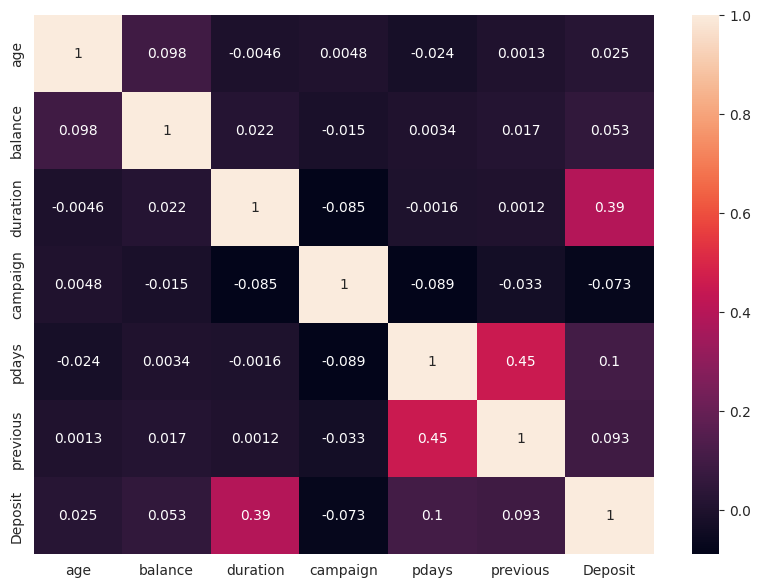

In [ ]:
plt.figure(figsize=(10,7))
correlation=d1.corr()
sns.heatmap(correlation,annot=True)

In [ ]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [ ]:
x=d1.drop(columns=['Deposit'])
x

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825,977,3,-1,0
45207,71,1729,456,2,-1,0
45208,72,5715,1127,5,184,3
45209,57,668,508,4,-1,0


In [ ]:
y=df['Deposit']
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Deposit, Length: 45211, dtype: object

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
#Logistic Regression
Lor=LogisticRegression()
Lor.fit(x_train,y_train)

In [ ]:
#Train the Decision Tree Classifier:

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Train Data

y_pred = dtc.predict(x_train)

print(f"Confusion Matrix =\n",confusion_matrix(y_train,y_pred))
print("                                                     ")
print(f"Accuracy Score = {accuracy_score(y_train,y_pred)}")
print("                                                     ")
print(f"Classification report= \n{classification_report(y_train,y_pred)}")

Confusion Matrix =
 [[31928     0]
 [    3  4237]]
                                                     
Accuracy Score = 0.9999170537491705
                                                     
Classification report= 
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     31928
         yes       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [ ]:
# Test Data

y_pred = dtc.predict(x_test)

print(f"Confusion Matrix =\n",confusion_matrix(y_test,y_pred))
print("                                                     ")
print(f"Accuracy Score = {accuracy_score(y_test,y_pred)}")
print("                                                     ")
print(f"Classification report= \n{classification_report(y_test,y_pred)}")

Confusion Matrix =
 [[7298  696]
 [ 661  388]]
                                                     
Accuracy Score = 0.8499391794758376
                                                     
Classification report= 
              precision    recall  f1-score   support

          no       0.92      0.91      0.91      7994
         yes       0.36      0.37      0.36      1049

    accuracy                           0.85      9043
   macro avg       0.64      0.64      0.64      9043
weighted avg       0.85      0.85      0.85      9043



In [ ]:
x.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')